In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv("StockPricesDataSet.csv")

In [83]:

df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [84]:
df.tail()

,symbol,date,open,high,low,close,volume
497467,XYL,2017-12-29,68.53,68.80,67.92,68.20,1046677
497468,YUM,2017-12-29,82.64,82.71,81.59,81.61,1347613
497469,ZBH,2017-12-29,121.75,121.95,120.62,120.67,1023624
497470,ZION,2017-12-29,51.28,51.55,50.81,50.83,1261916
497471,ZTS,2017-12-29,72.55,72.76,72.04,72.04,1704122


In [85]:
df.shape

(497472, 7)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [87]:
#dropping date column
df = df.drop('date', axis=1)


In [88]:
## Check the missing values
df.isnull().sum()

,0
symbol,0
open,11
high,8
low,8
close,0
volume,0


In [89]:
## Check the missing values
df.isnull().sum()

,0
symbol,0
open,11
high,8
low,8
close,0
volume,0


In [90]:
#checking duplicate values
df.duplicated().sum()

np.int64(753)

In [91]:
#checking data types
df.dtypes

,0
symbol,object
open,float64
high,float64
low,float64
close,float64
volume,int64


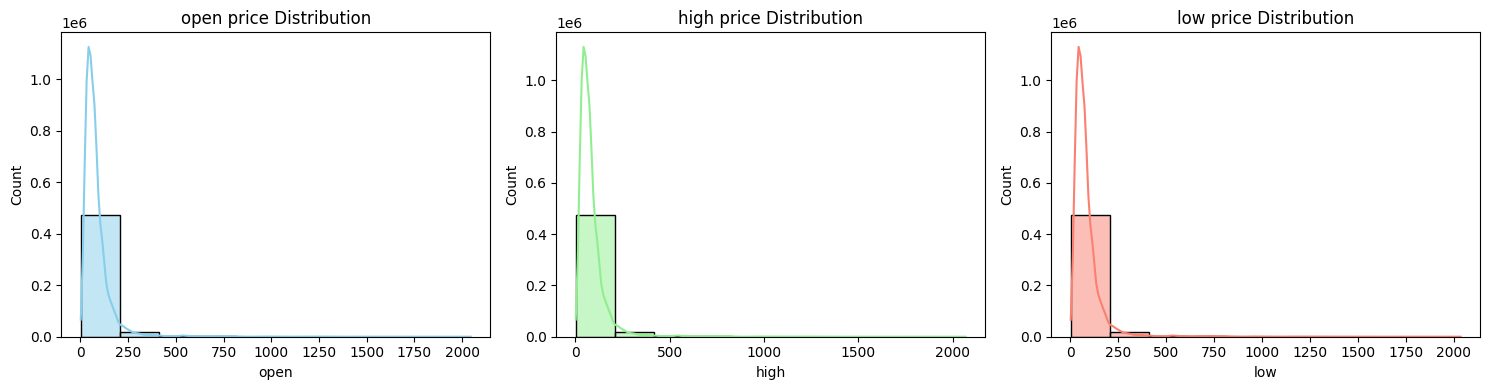

In [92]:
#checking distibution
# Creating subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot with histogram + KDE curve
sns.histplot(df['open'], kde=True, bins=10, ax=axes[0], color="skyblue")
axes[0].set_title("open price Distribution")

sns.histplot(df['high'], kde=True, bins=10, ax=axes[1], color="lightgreen")
axes[1].set_title("high price Distribution")

sns.histplot(df['low'], kde=True, bins=10, ax=axes[2], color="salmon")
axes[2].set_title("low price Distribution")

plt.tight_layout()
plt.show()

In [93]:
df.head()

,symbol,open,high,low,close,volume
0,AAL,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [94]:

# Fill missing values in open,low,high using median
df[['open','high','low']] = df[['open','high','low']].fillna(df[['open','high','low']].median())


In [95]:
#checking null values after filling with median

df.isnull().sum()

,0
symbol,0
open,0
high,0
low,0
close,0
volume,0


In [96]:
#fetchig numerical columns
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)
print(len(numerical_columns))

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
5


In [97]:
#fetchig categorical columns
categorical_columns=df.select_dtypes(include=['object']).columns
print(categorical_columns)
print(len(categorical_columns))

Index(['symbol'], dtype='object')
1


In [98]:
#tocheck types of data in a categorical column
df['symbol'].value_counts()

,count
symbol,
YUM,1007
XYL,1007
XRX,1007
XRAY,1007
XOM,1007
...,...
DXC,189
BHGE,126
BHF,117


In [99]:
df.describe()

,open,high,low,close,volume
count,497472.000000,497472.000000,497472.000000,497472.000000,4.974720e+05
mean,86.351802,87.132215,85.552127,86.369082,4.253611e+06
std,101.470156,102.311276,100.570184,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


# EDA

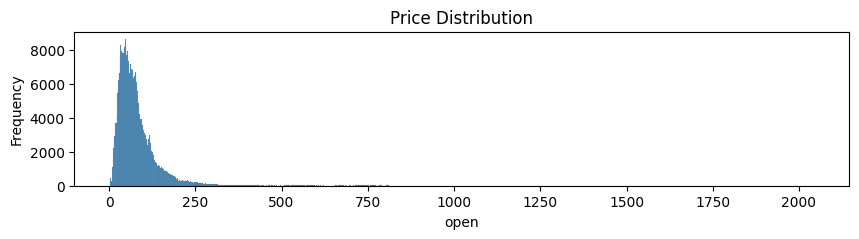

In [100]:


import seaborn as sns
plt.figure(figsize=(10,2))
sns.histplot(df["open"])
plt.title("Price Distribution")
plt.xlabel("open")
plt.ylabel("Frequency")
plt.show()

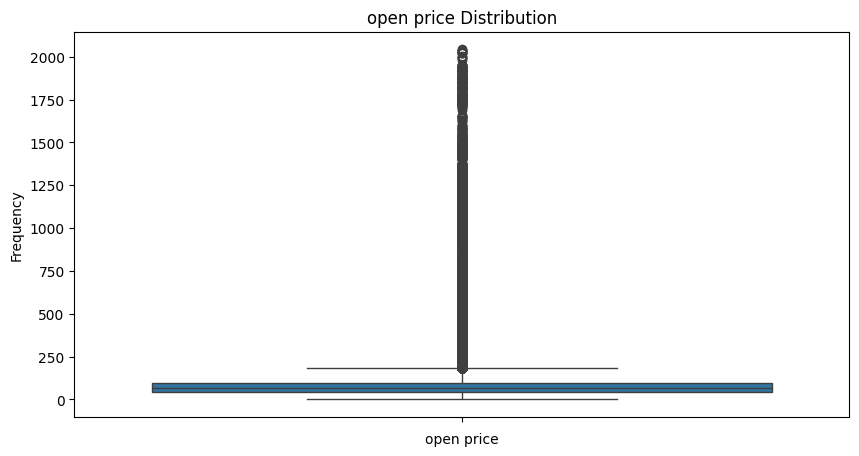

In [101]:
#boxplot-->used to check outliers for numerical columns
plt.figure(figsize=(10,5))
sns.boxplot(df["open"])
plt.title("open price Distribution")
plt.xlabel("open price")
plt.ylabel("Frequency")
plt.show()

In [102]:
df.head()

,symbol,open,high,low,close,volume
0,AAL,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [103]:
#i want to check correlation between the variables
corr_matrix=df[numerical_columns].corr()
corr_matrix

,open,high,low,close,volume
open,1.000000,0.999941,0.999928,0.999854,-0.148722
high,0.999941,1.000000,0.999905,0.999917,-0.148342
low,0.999928,0.999905,1.000000,0.999920,-0.149282
close,0.999854,0.999917,0.999920,1.000000,-0.148839
volume,-0.148722,-0.148342,-0.149282,-0.148839,1.000000


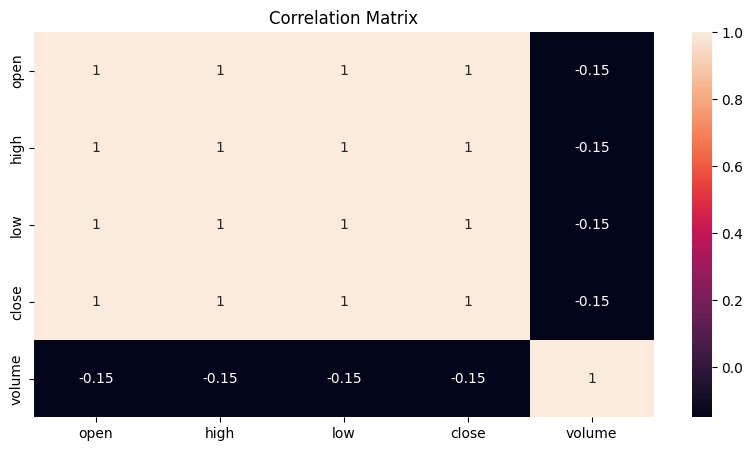

In [104]:
#plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

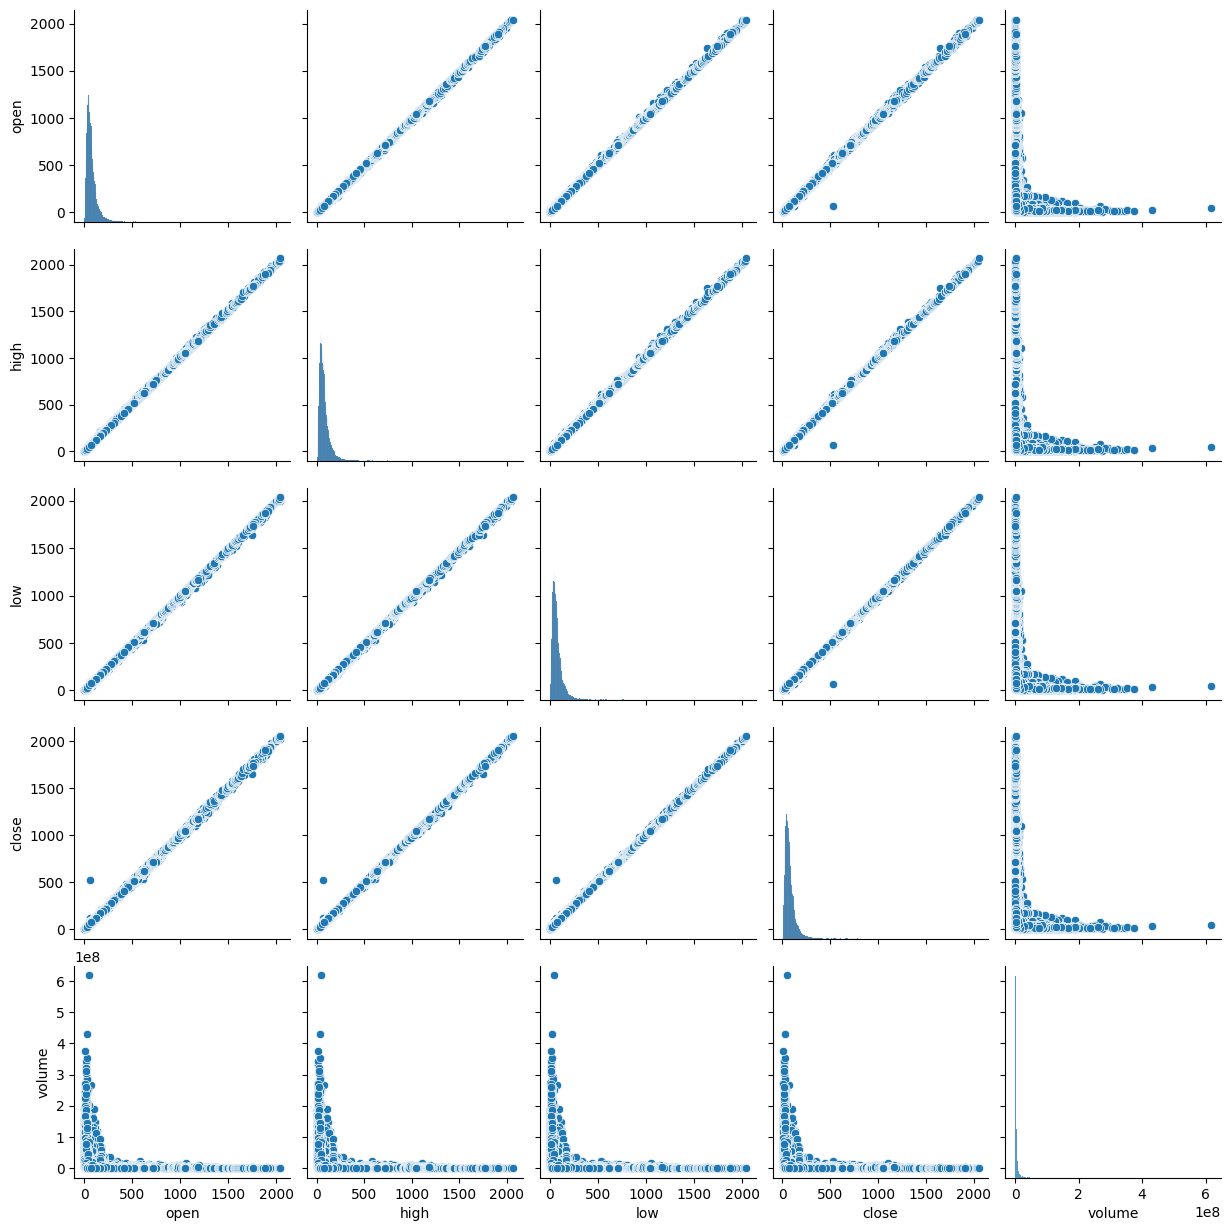

In [105]:
#pairplot
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'close Price')

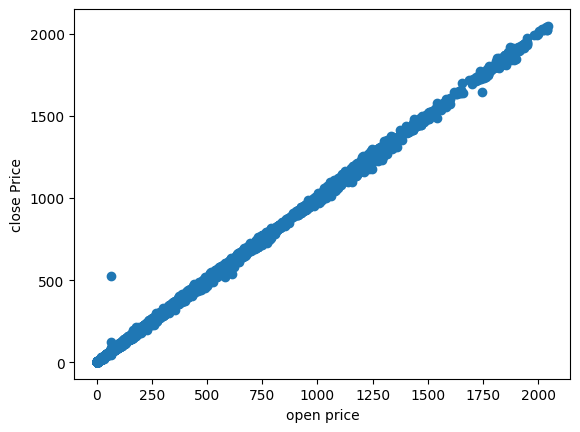

In [106]:
#scatter plot
plt.scatter(df['open'],df['close'])
plt.xlabel("open price")
plt.ylabel("close Price")

In [107]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['symbol'], drop_first=True)
print(df_encoded)

            open      high       low     close    volume  symbol_AAL  \
0        25.0700   25.8200   25.0600   25.3600   8998943        True   
1        79.3828   79.5756   78.8601   79.0185  58791957       False   
2       110.3600  111.8800  109.2900  109.7400    542711       False   
3        52.1200   52.3300   51.5200   51.9800   4569061       False   
4        70.1100   70.2300   69.4800   69.8900   1148391       False   
...          ...       ...       ...       ...       ...         ...   
497467   68.5300   68.8000   67.9200   68.2000   1046677       False   
497468   82.6400   82.7100   81.5900   81.6100   1347613       False   
497469  121.7500  121.9500  120.6200  120.6700   1023624       False   
497470   51.2800   51.5500   50.8100   50.8300   1261916       False   
497471   72.5500   72.7600   72.0400   72.0400   1704122       False   

        symbol_AAP  symbol_AAPL  symbol_ABBV  symbol_ABC  ...  symbol_XL  \
0            False        False        False       False  .

In [108]:
df.head()

,symbol,open,high,low,close,volume
0,AAL,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,70.1100,70.2300,69.4800,69.8900,1148391


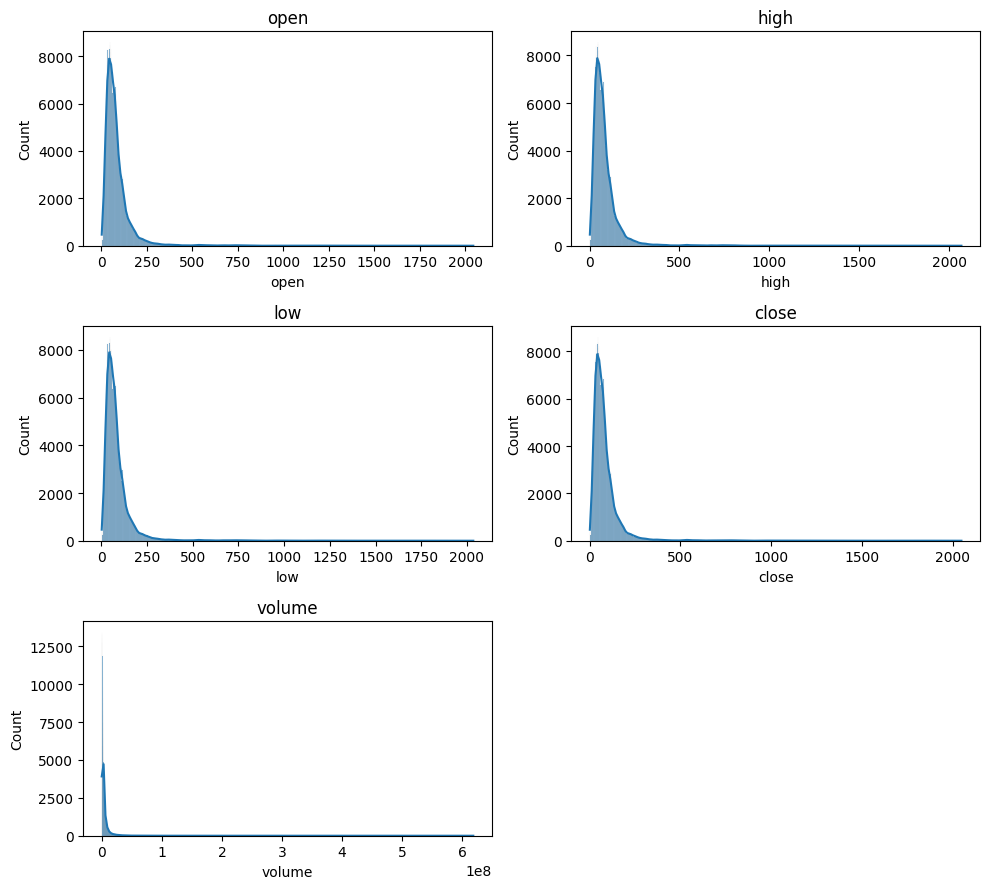

In [109]:
#Checking distribution of each column
# Get numeric columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Set grid size (2 plots per row here, adjust if needed)
n_cols = 2
n_rows = (len(num_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))  # smaller plots
axes = axes.flatten()  # flatten to 1D for easy looping

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [110]:
#splitting and normalizing, im taking volume prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('volume', axis=1)
y = df['volume']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Select numeric columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

# Fit only on training, transform both
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [111]:
X_train

,symbol,open,high,low,close
453940,NEE,0.072797,0.072207,0.073026,0.072917
112734,CL,0.033334,0.032909,0.033070,0.032954
164697,LOW,0.033911,0.034351,0.034098,0.034531
295708,USB,0.020055,0.020099,0.020157,0.020206
238303,COG,0.007819,0.007913,0.007632,0.007707
...,...,...,...,...,...
259178,EW,0.037118,0.038189,0.037215,0.037809
365838,REG,0.032722,0.032367,0.032131,0.031938
131932,ITW,0.044732,0.044737,0.044911,0.044691
146867,ANDV,0.041682,0.042467,0.041685,0.042752


In [112]:
y_train

,volume
453940,874935
112734,2409105
164697,5523399
295708,7807950
238303,10066548
...,...
259178,2462286
365838,1096828
131932,3866576
146867,3127766
